In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gmplot 
import statistics

from sklearn.ensemble import RandomForestRegressor

# - Data load

In [2]:
train = pd.read_csv('data/total_rent.csv')
train = train.iloc[:,1:]
tashu = pd.read_csv('data/tashu.csv')
station = pd.read_csv('data/station.csv')

# [1-a] 탐색분석(bar chart)

## - 계절별 대여량

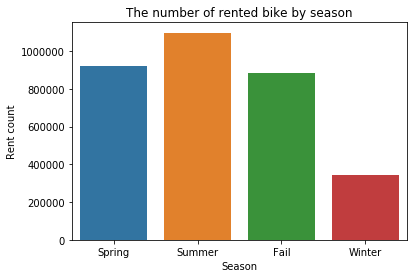

In [3]:
group_season = train.groupby(['SEASON'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_season['SEASON'] , y=group_season['RENTCOUNT'])
ax.set(xlabel='Season' , ylabel = 'Rent count')
season = ['Spring', 'Summer' , 'Fail', 'Winter']
plt.xticks(np.arange(4) , season)
plt.title('The number of rented bike by season')
plt.show()

## - 요일별 대여량

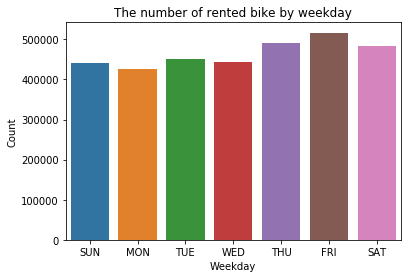

In [4]:
group_weekday = train.groupby(['WEEKDAY'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_weekday['WEEKDAY'] , y = group_weekday['RENTCOUNT'])
ax.set(xlabel = 'Weekday' , ylabel = 'Count')
weekday = ['SUN' , 'MON' , 'TUE' , 'WED','THU','FRI','SAT']
plt.xticks(np.arange(7), weekday)
plt.title('The number of rented bike by weekday')
plt.show()

## - 월별 대여량

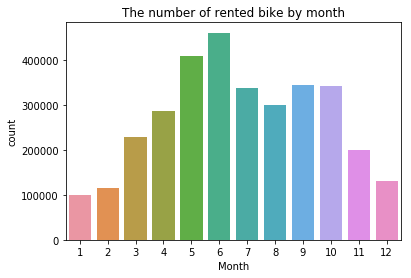

In [5]:

group_mn = train.groupby(['MONTH'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_mn['MONTH'] , y=group_mn['RENTCOUNT'])
ax.set(xlabel ='Month' , ylabel = 'count')
plt.title('The number of rented bike by month')
plt.show()

## - 시간별 대여량

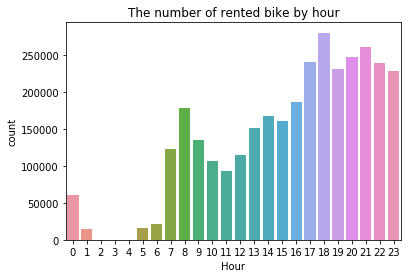

In [6]:

group_hr = train.groupby(['HOUR'])['RENTCOUNT'].sum().reset_index()
ax = sns.barplot(x=group_hr['HOUR'] , y=group_hr['RENTCOUNT'])
ax.set(xlabel ='Hour' , ylabel = 'count')
plt.title('The number of rented bike by hour')
plt.show()

# [1-b] Top 10 인기 경로

### Data Preprocessing

In [7]:
tashu_data = tashu

In [8]:
tashu_data.dropna(axis= 0)
tashu_data = tashu_data[tashu_data['RENT_STATION'] <= 144 ]
tashu_data = tashu_data[tashu_data['RETURN_STATION'] <= 144 ]

In [9]:
tashu_data = tashu_data[['RENT_STATION' , 'RETURN_STATION']]

In [10]:
differ_tashu = tashu_data[tashu_data['RENT_STATION']!= tashu_data['RETURN_STATION'] ]

In [11]:
tashu_data = tashu_data.groupby(['RENT_STATION','RETURN_STATION'])

In [12]:
tashu_data = tashu_data.size().to_frame('SUM').reset_index()

In [13]:
tashu_data

RENT_STATION  RETURN_STATION    SUM
0               1.0             1.0  14489
1               1.0             2.0    660
2               1.0             3.0   6135
3               1.0             4.0    851
4               1.0             5.0    802
5               1.0             6.0    289
6               1.0             7.0    666
7               1.0             8.0    549
8               1.0             9.0    281
9               1.0            10.0    681
10              1.0            11.0    203
11              1.0            12.0    816
12              1.0            13.0    269
13              1.0            14.0   1021
14              1.0            15.0    330
15              1.0            16.0    145
16              1.0            17.0   1079
17              1.0            18.0    304
18              1.0            19.0    421
19              1.0            20.0     80
20              1.0            21.0    375
21              1.0            22.0    207
22              1.0            23.0    348
23              1.0            24.0    117
24              1.0            25.0    241
25              1.0            26.0    520
26              1.0            27.0    685
27              1.0            28.0    447
28              1.0            29.0    427
29              1.0            30.0    875
...             ...             ...    ...
18265         144.0           115.0     37
18266         144.0           116.0     76
18267         144.0           117.0     36
18268         144.0           118.0     46
18269         144.0           119.0      4
18270         144.0           120.0      3
18271         144.0           121.0      3
18272         144.0           122.0    102
18273         144.0           123.0    102
18274         144.0           124.0     93
18275         144.0           125.0     90
18276         144.0           126.0     37
18277         144.0           127.0     47
18278         144.0           128.0     51
18279         144.0           129.0     46
18280         144.0           130.0     88
18281         144.0           131.0     38
18282         144.0           132.0     48
18283         144.0           133.0     19
18284         144.0           134.0      6
18285         144.0           135.0      5
18286         144.0           136.0      1
18287         144.0           137.0      2
18288         144.0           138.0      2
18289         144.0           139.0      6
18290         144.0           140.0      1
18291         144.0           141.0      3
18292         144.0           142.0     31
18293         144.0           143.0     19
18294         144.0           144.0   3843

[18295 rows x 3 columns]

In [14]:
differ_tashu = differ_tashu.groupby(['RENT_STATION','RETURN_STATION'])

In [15]:
differ_tashu = differ_tashu.size().to_frame('SUM').reset_index()

In [16]:
differ_tashu

RENT_STATION  RETURN_STATION   SUM
0               1.0             2.0   660
1               1.0             3.0  6135
2               1.0             4.0   851
3               1.0             5.0   802
4               1.0             6.0   289
5               1.0             7.0   666
6               1.0             8.0   549
7               1.0             9.0   281
8               1.0            10.0   681
9               1.0            11.0   203
10              1.0            12.0   816
11              1.0            13.0   269
12              1.0            14.0  1021
13              1.0            15.0   330
14              1.0            16.0   145
15              1.0            17.0  1079
16              1.0            18.0   304
17              1.0            19.0   421
18              1.0            20.0    80
19              1.0            21.0   375
20              1.0            22.0   207
21              1.0            23.0   348
22              1.0            24.0   117
23              1.0            25.0   241
24              1.0            26.0   520
25              1.0            27.0   685
26              1.0            28.0   447
27              1.0            29.0   427
28              1.0            30.0   875
29              1.0            31.0  2615
...             ...             ...   ...
18121         144.0           114.0     2
18122         144.0           115.0    37
18123         144.0           116.0    76
18124         144.0           117.0    36
18125         144.0           118.0    46
18126         144.0           119.0     4
18127         144.0           120.0     3
18128         144.0           121.0     3
18129         144.0           122.0   102
18130         144.0           123.0   102
18131         144.0           124.0    93
18132         144.0           125.0    90
18133         144.0           126.0    37
18134         144.0           127.0    47
18135         144.0           128.0    51
18136         144.0           129.0    46
18137         144.0           130.0    88
18138         144.0           131.0    38
18139         144.0           132.0    48
18140         144.0           133.0    19
18141         144.0           134.0     6
18142         144.0           135.0     5
18143         144.0           136.0     1
18144         144.0           137.0     2
18145         144.0           138.0     2
18146         144.0           139.0     6
18147         144.0           140.0     1
18148         144.0           141.0     3
18149         144.0           142.0    31
18150         144.0           143.0    19

[18151 rows x 3 columns]

### 대여, 반납 인기 Top 10 가져오기

In [17]:
top = tashu_data['SUM'].nlargest(10)

In [18]:
top

287      84496
4155     21749
7488     18343
2876     17220
0        14489
4300     12177
13471    12154
4441     11973
2242     11966
7464     11868
Name: SUM, dtype: int64

## 돌아오는 경로가 다른 Top10

In [19]:
differ_top = differ_tashu['SUM'].nlargest(10)

In [20]:
differ_top

2855     17220
13367    12154
7409     11868
4292     11118
13368     8074
13696     7912
2991      7463
2785      6556
1         6135
13444     6065
Name: SUM, dtype: int64

## Station 찾기

In [21]:
top_course = []

for i in top.index :
    place = []
    place.append(tashu_data.loc[i,'RENT_STATION'])
    place.append(tashu_data.loc[i,'RETURN_STATION'])
    top_course.append(place)

In [22]:
differ_top_course = []

for i in differ_top.index :
    place = []
    place.append(differ_tashu.loc[i,'RENT_STATION'])
    place.append(differ_tashu.loc[i,'RETURN_STATION'])
    differ_top_course.append(place)

In [23]:
top_course

[[3.0, 3.0],
 [31.0, 31.0],
 [56.0, 56.0],
 [21.0, 105.0],
 [1.0, 1.0],
 [32.0, 32.0],
 [105.0, 21.0],
 [33.0, 33.0],
 [17.0, 17.0],
 [56.0, 32.0]]

In [24]:
differ_top_course

[[21.0, 105.0],
 [105.0, 21.0],
 [56.0, 32.0],
 [32.0, 56.0],
 [105.0, 22.0],
 [107.0, 105.0],
 [22.0, 105.0],
 [21.0, 22.0],
 [1.0, 3.0],
 [105.0, 107.0]]

## Map 경로 표시

## Top10 

In [25]:
import gmplot
import statistics

#변수
top10_lat = []
top10_lon = []
for i in top_course :
    # rent
    sp = station.iloc[int(i[0]-1),7].split(',')
    top10_lat.append(float(sp[0]))
    top10_lon.append(float(sp[1]))
    
    # return
    sp2 = station.iloc[int(i[1]-1),7].split(',')
    top10_lat.append(float(sp2[0]))
    top10_lon.append(float(sp2[1]))

In [26]:
gmapl = gmplot.GoogleMapPlotter(statistics.median(top10_lat) , statistics.median(top10_lon) , 14)
for i in range(0, len(top10_lat) , 2) :
    rent_return_lat = top10_lat[i:i+2]
    rent_return_lon = top10_lon[i:i+2]
    #gmapl.plot(rent_return_lat, rent_return_lon, 'cornflowerblue', edge_width = 3.0)
    gmapl.polygon(rent_return_lat, rent_return_lon, 'cornflowerblue', edge_width = 3.0)
    gmapl.scatter(rent_return_lat, rent_return_lon , '#FF0000' ,size = 30 ,marker=False )
gmapl.draw("top10.html")

## 돌아오는 경로가 다름 Top10

In [27]:
#변수
differ_top10_lat = []
differ_top10_lon = []
for i in differ_top_course :
    sp = station.iloc[int(i[0]-1),7].split(',')
    differ_top10_lat.append(float(sp[0]))
    differ_top10_lon.append(float(sp[1]))
    sp2 = station.iloc[int(i[1]-1),7].split(',')
    differ_top10_lat.append(float(sp2[0]))
    differ_top10_lon.append(float(sp2[1]))

In [28]:
gmapl2 = gmplot.GoogleMapPlotter(statistics.median(differ_top10_lat) , statistics.median(differ_top10_lon) , 14)
for i in range(0, len(differ_top10_lat) , 2) :
    rent_return_lat2 = differ_top10_lat[i:i+2]
    rent_return_lon2 = differ_top10_lon[i:i+2]
    #gmapl.plot(rent_return_lat, rent_return_lon, 'cornflowerblue', edge_width = 3.0)
    gmapl2.polygon(rent_return_lat2, rent_return_lon2, 'cornflowerblue', edge_width = 3.0)
    gmapl2.scatter(rent_return_lat2, rent_return_lon2 , '#FF0000' ,size = 30 ,marker=False )
gmapl2.draw("differ_top10.html")

# [1-c] 이용경로

In [29]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

LW = 0.3


def polar2xy(r, theta):
    return np.array([r*np.cos(theta), r*np.sin(theta)])

def hex2rgb(c):
    return tuple(int(c[i:i+2], 16)/256.0 for i in (1, 3 ,5))

def IdeogramArc(start=0, end=60, radius=1.0, width=0.2, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start > end:
        start, end = end, start
    start *= np.pi/180.
    end *= np.pi/180.
    # optimal distance to the control points
    # https://stackoverflow.com/questions/1734745/how-to-create-circle-with-b%C3%A9zier-curves
    opt = 4./3. * np.tan((end-start)/ 4.) * radius
    inner = radius*(1-width)
    verts = [
        polar2xy(radius, start),
        polar2xy(radius, start) + polar2xy(opt, start+0.5*np.pi),
        polar2xy(radius, end) + polar2xy(opt, end-0.5*np.pi),
        polar2xy(radius, end),
        polar2xy(inner, end),
        polar2xy(inner, end) + polar2xy(opt*(1-width), end-0.5*np.pi),
        polar2xy(inner, start) + polar2xy(opt*(1-width), start+0.5*np.pi),
        polar2xy(inner, start),
        polar2xy(radius, start),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.LINETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CLOSEPOLY,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(0.5,), edgecolor=color+(0.4,), lw=LW)
        ax.add_patch(patch)


def ChordArc(start1=0, end1=60, start2=180, end2=240, radius=1.0, chordwidth=0.7, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start1 > end1:
        start1, end1 = end1, start1
    if start2 > end2:
        start2, end2 = end2, start2
    start1 *= np.pi/180.
    end1 *= np.pi/180.
    start2 *= np.pi/180.
    end2 *= np.pi/180.
    opt1 = 4./3. * np.tan((end1-start1)/ 4.) * radius
    opt2 = 4./3. * np.tan((end2-start2)/ 4.) * radius
    rchord = radius * (1-chordwidth)
    verts = [
        polar2xy(radius, start1),
        polar2xy(radius, start1) + polar2xy(opt1, start1+0.5*np.pi),
        polar2xy(radius, end1) + polar2xy(opt1, end1-0.5*np.pi),
        polar2xy(radius, end1),
        polar2xy(rchord, end1),
        polar2xy(rchord, start2),
        polar2xy(radius, start2),
        polar2xy(radius, start2) + polar2xy(opt2, start2+0.5*np.pi),
        polar2xy(radius, end2) + polar2xy(opt2, end2-0.5*np.pi),
        polar2xy(radius, end2),
        polar2xy(rchord, end2),
        polar2xy(rchord, start1),
        polar2xy(radius, start1),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(0.5,), edgecolor=color+(0.4,), lw=LW)
        ax.add_patch(patch)

def selfChordArc(start=0, end=60, radius=1.0, chordwidth=0.7, ax=None, color=(1,0,0)):
    # start, end should be in [0, 360)
    if start > end:
        start, end = end, start
    start *= np.pi/180.
    end *= np.pi/180.
    opt = 4./3. * np.tan((end-start)/ 4.) * radius
    rchord = radius * (1-chordwidth)
    verts = [
        polar2xy(radius, start),
        polar2xy(radius, start) + polar2xy(opt, start+0.5*np.pi),
        polar2xy(radius, end) + polar2xy(opt, end-0.5*np.pi),
        polar2xy(radius, end),
        polar2xy(rchord, end),
        polar2xy(rchord, start),
        polar2xy(radius, start),
        ]

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    if ax == None:
        return verts, codes
    else:
        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color+(0.5,), edgecolor=color+(0.4,), lw=LW)
        ax.add_patch(patch)

def chordDiagram(X, ax, colors=None, width=0.1, pad=2, chordwidth=0.7):
    """Plot a chord diagram
    Parameters
    ----------
    X :
        flux data, X[i, j] is the flux from i to j
    ax :
        matplotlib `axes` to show the plot
    colors : optional
        user defined colors in rgb format. Use function hex2rgb() to convert hex color to rgb color. Default: d3.js category10
    width : optional
        width/thickness of the ideogram arc
    pad : optional
        gap pad between two neighboring ideogram arcs, unit: degree, default: 2 degree
    chordwidth : optional
        position of the control points for the chords, controlling the shape of the chords
    """
    # X[i, j]:  i -> j
    x = X.sum(axis = 1) # sum over rows
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

    if colors is None:
        colors = ['#1f77b4', '#ff7f0e', '#2ca02a', '#d62ab8', '#9ab7bd',
                  '#8c564b', '#e37bc2', '#7f7fff', '#bcbaa2', '#1a12cf',
                 '#1f77b5', '#ff7f01', '#2ca02b', '#d62728', '#9467bd',
                  '#8c5a4b', '#e3b7c2', '#3b7f7f', '#4bbd22', '#5bbecf',
                 '#ab47b6', '#dd7f02', '#2ac02c', '#d62228', '#9bf7bd',
                 '#1f77b4', '#ff7f0e', '#2ca02a', '#d62ab8', '#9ab7bd',
                  '#8c564b', '#e37bc2', '#7f7fff', '#bcbaa2', '#1a12cf',
                 '#1f77b5', '#ff7f01', '#2ca02b', '#d62728', '#9467bd',
                  '#8c5a4b', '#e3b7c2', '#3b7f7f', '#4bbd22', '#5bbecf',
                 '#ab47b6', '#dd7f02', '#2ac02c', '#d62228', '#9bf7bd',
                 '#1f77b4', '#ff7f0e', '#2ca02a', '#d62ab8', '#9ab7bd',
                  '#8c564b', '#e37bc2', '#7f7fff', '#bcbaa2', '#1a12cf',
                 '#1f77b5', '#ff7f01', '#2ca02b', '#d62728', '#9467bd',
                  '#8c5a4b', '#e3b7c2', '#3b7f7f', '#4bbd22', '#5bbecf',
                 '#ab47b6', '#dd7f02', '#2ac02c', '#d62228', '#9bf7bd',
                 '#1f77b4', '#ff7f0e', '#2ca02a', '#d62ab8', '#9ab7bd',
                  '#8c564b', '#e37bc2', '#7f7fff', '#bcbaa2', '#1a12cf',
                 '#1f77b5', '#ff7f01', '#2ca02b', '#d62728', '#9467bd',
                  '#8c5a4b', '#e3b7c2', '#3b7f7f', '#4bbd22', '#5bbecf',
                 '#ab47b6', '#dd7f02', '#2ac02c', '#d62228', '#9bf7bd',
                  '#1f77b4', '#ff7f0e', '#2ca02a', '#d62ab8', '#9ab7bd',
                  '#8c564b', '#e37bc2', '#7f7fff', '#bcbaa2', '#1a12cf',
                 '#1f77b5', '#ff7f01', '#2ca02b', '#d62728', '#9467bd',
                  '#8c5a4b', '#e3b7c2', '#3b7f7f', '#4bbd22', '#5bbecf',
                 '#ab47b6', '#dd7f02', '#2ac02c', '#d62228', '#9bf7bd',
                 '#1f77c7', '#ff7f14', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f7cc8', '#ff7f15', '#2ca02c', '#d62728', '#9467bd',
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                 '#1f77b4', '#ff7f16', '#2ca02c', '#d62728']
 
        colors = [hex2rgb(colors[i]) for i in range(len(x))]

    # find position for each start and end
    y = x/np.sum(x).astype(float) * (360 - pad*len(x))

    pos = {}
    arc = []
    nodePos = []
    start = 0
    for i in range(len(x)):
        end = start + y[i]
        arc.append((start, end))
        angle = 0.5*(start+end)
        
        if -30 <= angle <= 210:
            angle -= 90
        else:
            angle -= 270
        nodePos.append(tuple(polar2xy(1.1, 0.5*(start+end)*np.pi/180.)) + (angle,))
        z = (X[i, :]/x[i].astype(float)) * (end - start)
        ids = np.argsort(z)
        z0 = start
        for j in ids:
            pos[(i, j)] = (z0, z0+z[j])
            z0 += z[j]
        start = end + pad

    for i in range(len(x)):
        start, end = arc[i]
        IdeogramArc(start=start, end=end, radius=1.0, ax=ax, color=colors[i], width=width)
        start, end = pos[(i,i)]
        selfChordArc(start, end, radius=1.-width, color=colors[i], chordwidth=chordwidth*0.7, ax=ax)
        for j in range(i):
            color = colors[i]
            if X[i, j] > X[j, i]:
                color = colors[j]
            start1, end1 = pos[(i,j)]
            start2, end2 = pos[(j,i)]
            ChordArc(start1, end1, start2, end2,
                     radius=1.-width, color=colors[i], chordwidth=chordwidth, ax=ax)

    return nodePos

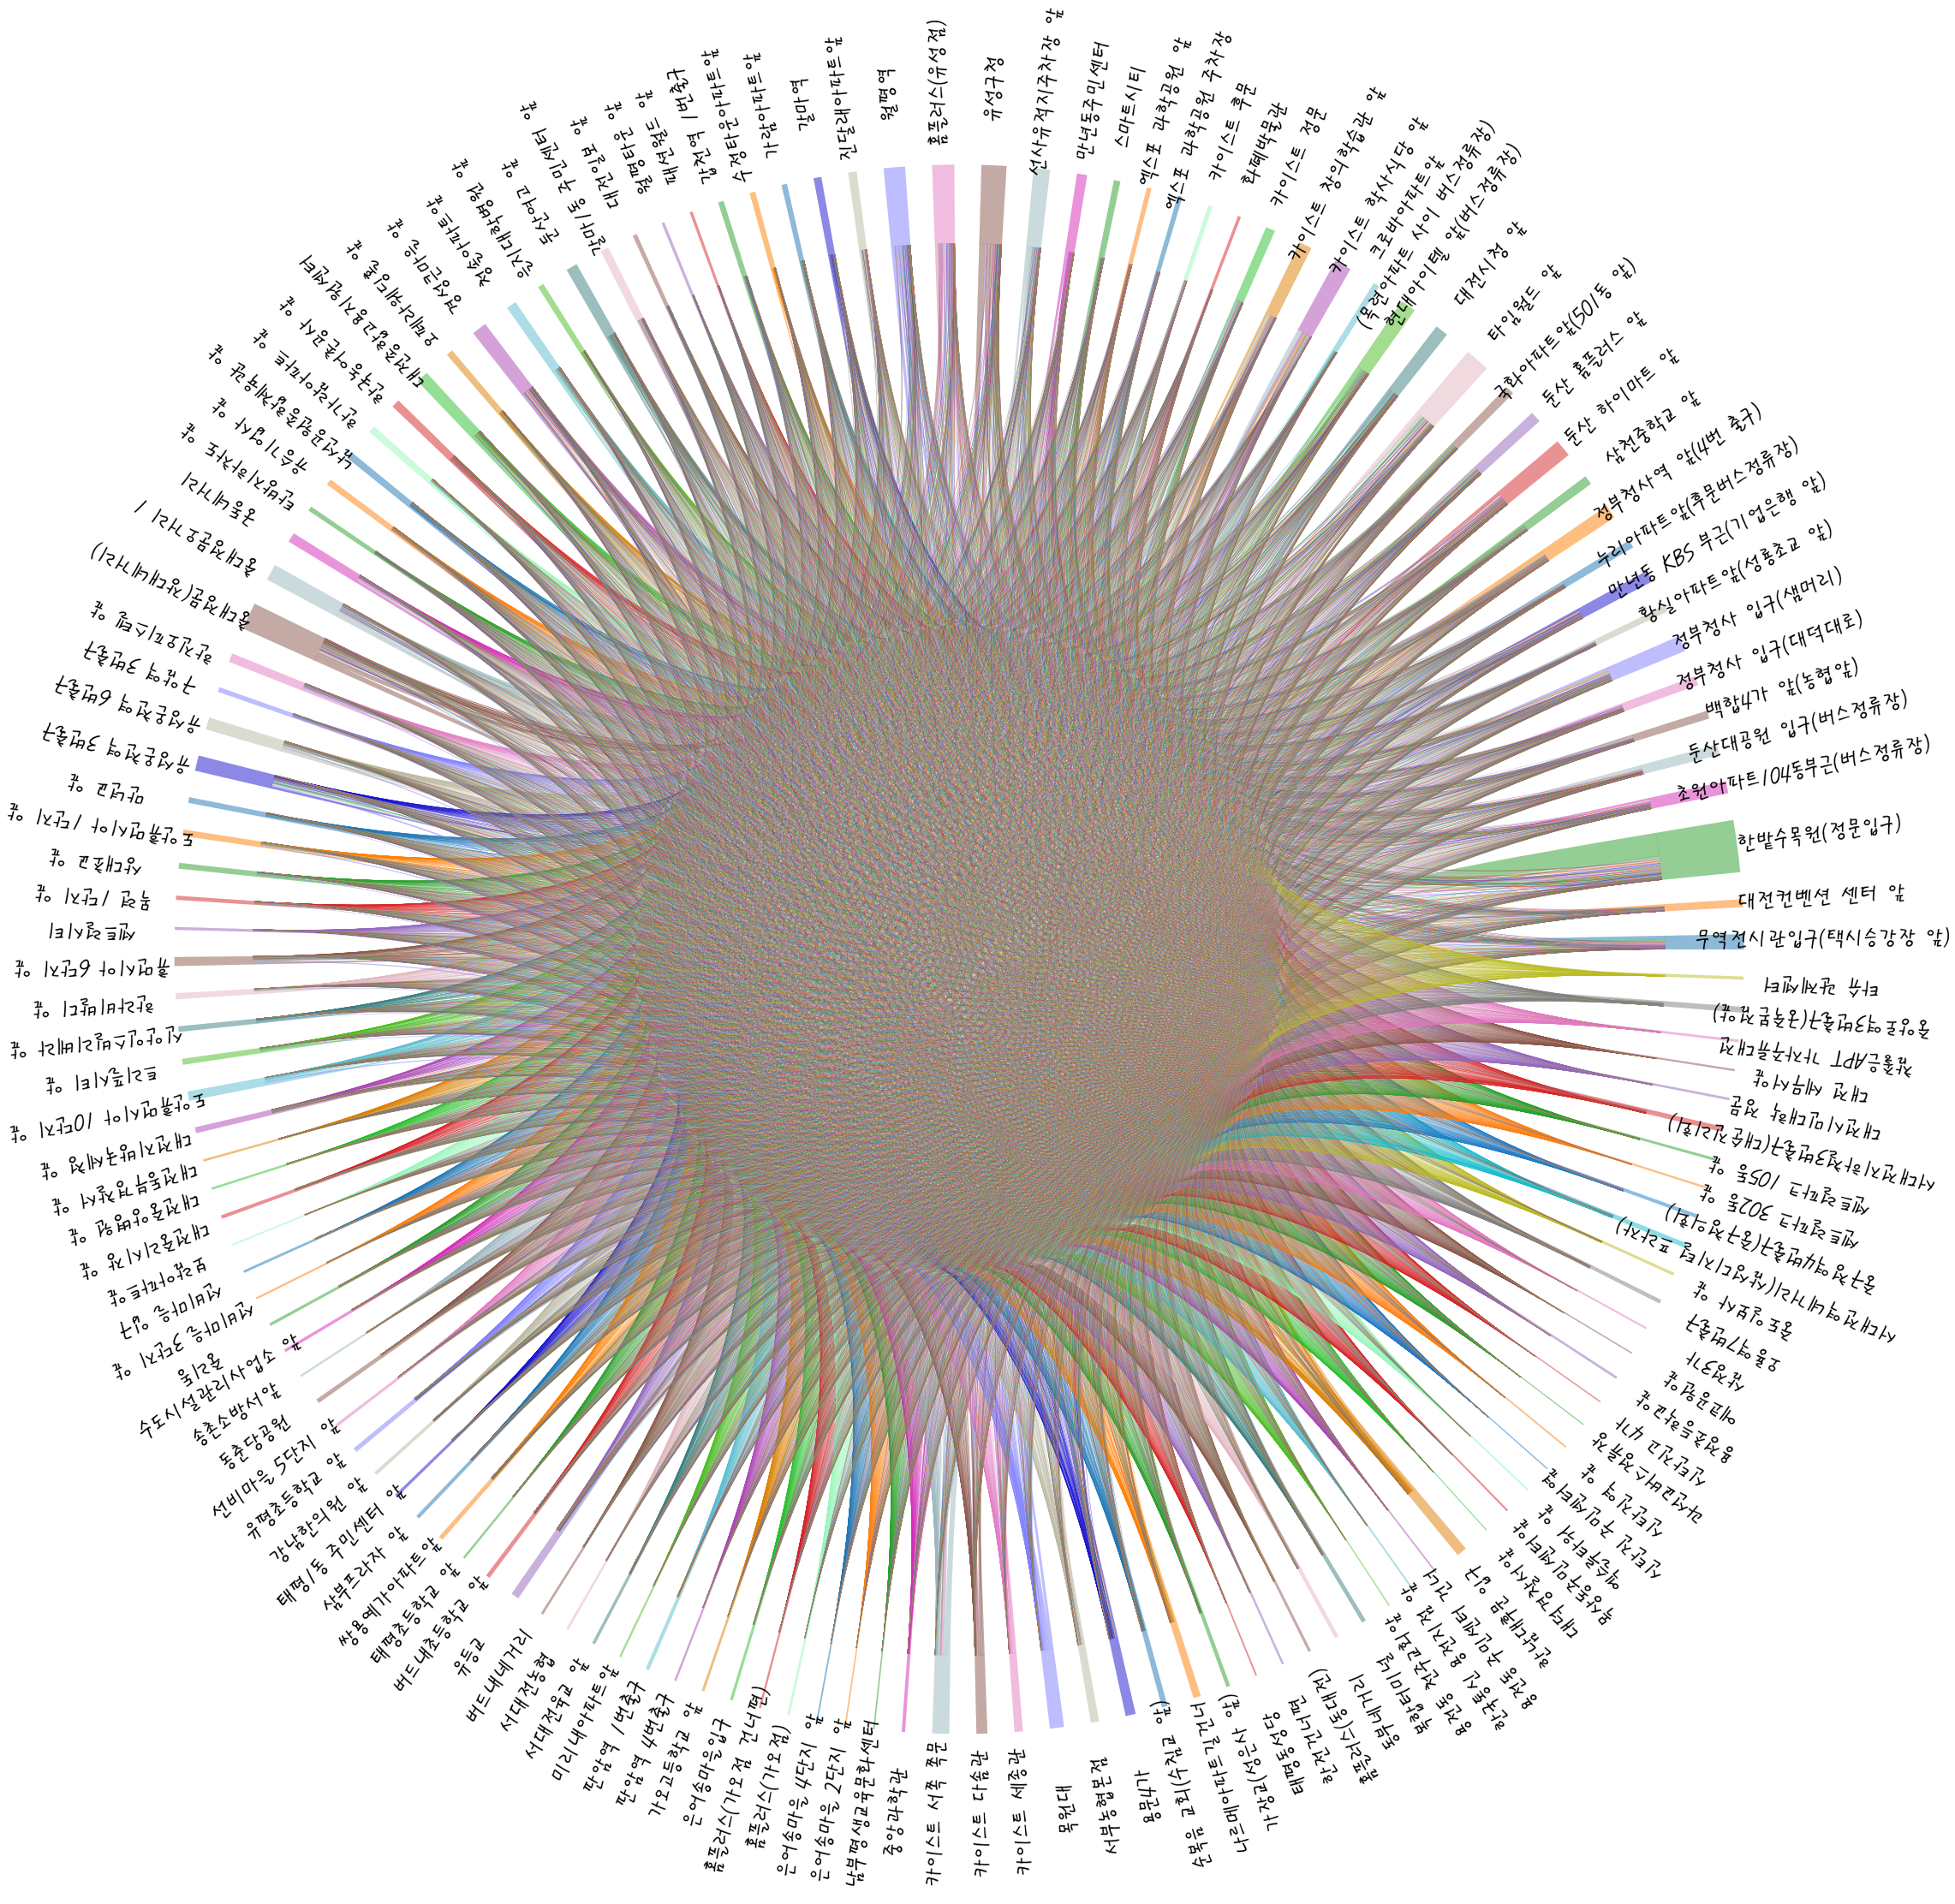

In [30]:
fig = plt.figure(figsize=(28,28))
flux = np.zeros((144,144))

for i in range(0,len(tashu_data)) :
    flux[int(tashu_data.loc[i,'RENT_STATION']-1)][int(tashu_data.loc[i,'RETURN_STATION']-1)] = tashu_data.loc[i,'SUM']

ax = plt.axes([0,0,1,1])

font_path = 'HMFMPYUN.TTF'
font_name = font_manager.FontProperties(fname=font_path).get_name()


nodePos = chordDiagram(flux, ax)
ax.axis('off')
prop = dict(fontsize=25, ha='center', va='center')
nodes = station.loc[:,'명칭'].tolist()
plt.rc('font', family = font_name)
for i in range(144):
    ax.text(nodePos[i][0], nodePos[i][1], nodes[i], rotation=nodePos[i][2]+90 , **prop )
        
plt.savefig("Chord_diagram.png", dpi=600,transparent=True,bbox_inches='tight', pad_inches=0.02)
        

# [2-a] 예측 영향도 

## X_Train , Y_Train split

In [31]:

train['MONTH'] = train['MONTH'].astype('object')
train['HOUR'] = train['HOUR'].astype('object')
train['WEEKDAY'] = train['WEEKDAY'].astype('object')
train['SEASON'] = train['SEASON'].astype('object')

In [32]:
X = train.loc[:, ['MONTH', 'HOUR', 'WEEKDAY' ,'SEASON','TEMPERATURE','RAINFALL','WINDSPEED','HUMLDITY','SNOWFALL']]
y = train.iloc[:,-1]
X = X.fillna(0)
X

MONTH  HOUR  WEEKDAY  SEASON  TEMPERATURE  RAINFALL  WINDSPEED  \
0            1     0        1       3         -8.8       0.0        0.1   
1            1     1        1       3         -8.5       0.0        0.9   
2            1     2        1       3         -8.5       0.0        1.0   
3            1     3        1       3         -9.0       0.0        0.7   
4            1     4        1       3         -9.1       0.0        0.6   
5            1     5        1       3         -9.4       0.0        0.5   
6            1     6        1       3         -9.0       0.0        1.4   
7            1     7        1       3         -8.3       0.0        0.2   
8            1     8        1       3         -7.3       0.0        1.7   
9            1     9        1       3         -6.4       2.2        0.9   
10           1    10        1       3         -5.3       0.0        0.4   
11           1    11        1       3         -3.4       0.0        0.9   
12           1    12        1       3         -0.5       1.9        0.7   
13           1    13        1       3          3.1       0.0        2.0   
14           1    14        1       3          2.5       0.0        2.4   
15           1    15        1       3          0.8       0.2        3.8   
16           1    16        1       3          1.1       0.0        2.4   
17           1    17        1       3          0.5       0.0        2.2   
18           1    18        1       3         -1.4       0.5        0.5   
19           1    19        1       3         -1.7       0.0        1.2   
20           1    20        1       3         -2.0       0.0        1.0   
21           1    21        1       3         -2.4       0.0        1.1   
22           1    22        1       3         -3.3       0.0        0.2   
23           1    23        1       3         -3.2       0.0        1.4   
24           1     0        2       3         -1.3       0.8        2.5   
25           1     1        2       3         -0.8       0.0        0.9   
26           1     2        2       3         -1.3       0.0        3.4   
27           1     3        2       3         -3.5       1.8        3.8   
28           1     4        2       3         -5.3       0.0        2.8   
29           1     5        2       3         -6.5       0.0        1.8   
...        ...   ...      ...     ...          ...       ...        ...   
3784290     12    18        2       3          4.2       0.0        1.3   
3784291     12    19        2       3          4.3       0.0        1.1   
3784292     12    20        2       3          3.3       0.0        2.5   
3784293     12    21        2       3          2.7       1.0        2.8   
3784294     12    22        2       3          2.0       0.0        2.1   
3784295     12    23        2       3          1.8       0.0        1.4   
3784296     12     0        3       3          1.8       0.6        1.5   
3784297     12     1        3       3          1.7       0.0        0.5   
3784298     12     2        3       3          1.3       0.0        0.6   
3784299     12     3        3       3          1.0       0.0        1.0   
3784300     12     4        3       3          1.0       0.0        0.9   
3784301     12     5        3       3          0.4       0.0        0.5   
3784302     12     6        3       3          0.4       0.0        0.5   
3784303     12     7        3       3          0.0       0.0        1.2   
3784304     12     8        3       3          0.0       0.0        1.4   
3784305     12     9        3       3          0.4       0.0        0.3   
3784306     12    10        3       3          1.5       0.0        0.8   
3784307     12    11        3       3          2.4       0.0        1.2   
3784308     12    12        3       3          3.8       0.0        2.6   
3784309     12    13        3       3          4.7       0.0        2.1   
3784310     12    14        3       3          5.4       0.0        2.2   
3784311     12    15        3     

In [33]:
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         0.0
13         3.0
14         0.0
15         0.0
16         0.0
17         0.0
18         0.0
19         0.0
20         0.0
21         0.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
          ... 
3784290    0.0
3784291    0.0
3784292    0.0
3784293    1.0
3784294    0.0
3784295    0.0
3784296    0.0
3784297    0.0
3784298    0.0
3784299    0.0
3784300    0.0
3784301    0.0
3784302    0.0
3784303    3.0
3784304    0.0
3784305    0.0
3784306    0.0
3784307    0.0
3784308    0.0
3784309    0.0
3784310    1.0
3784311    0.0
3784312    4.0
3784313    5.0
3784314    0.0
3784315    0.0
3784316    2.0
3784317    0.0
3784318    3.0
3784319    0.0
Name: RENTCOUNT, Length: 3784320, dtype: float64

# Model 

In [34]:
rf = RandomForestRegressor(n_estimators = 50)

## Train & Test

In [35]:
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## 영향도 그래프

In [36]:
importances = list(rf.feature_importances_)

In [37]:
for i in range(0, len(importances)) :
    importances[i] = round(importances[i],2)
    

In [38]:
X.columns

Index(['MONTH', 'HOUR', 'WEEKDAY', 'SEASON', 'TEMPERATURE', 'RAINFALL',
       'WINDSPEED', 'HUMLDITY', 'SNOWFALL'],
      dtype='object')

In [39]:
importances

[0.03, 0.48, 0.04, 0.01, 0.26, 0.05, 0.04, 0.09, 0.0]

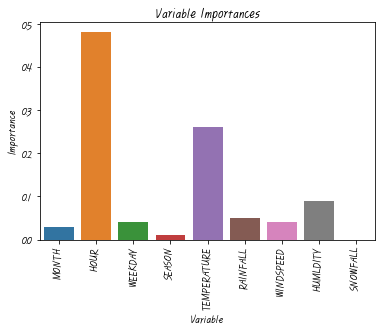

In [40]:
ax = sns.barplot(x=X.columns , y=importances )
ax.set(xlabel ='Variable' , ylabel = 'Importance')
plt.title('Variable Importances')
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()

## [2-b] 하루 시간별 대여량 예측 모델

## 2015년 1월 1일 3번 정류장

In [41]:
data_2015 = train[train['YEAR'] == 2015  ]
data_2015 = data_2015[data_2015['RENT_STATION'] == 3]
data_2015 = data_2015[data_2015['MONTH'] == 1]
data_2015 = data_2015[data_2015['DAY'] == 1]
data_2015

RENT_STATION  TEMPERATURE  RAINFALL  WINDSPEED  HUMLDITY  SNOWFALL  \
70080             3         -4.1       0.3        4.2      82.0       0.5   
70081             3         -5.7       NaN        2.8      74.0       0.5   
70082             3         -6.4       NaN        2.6      60.0       0.5   
70083             3         -6.5       0.0        2.7      53.0       0.5   
70084             3         -6.6       NaN        2.5      61.0       0.5   
70085             3         -7.0       NaN        2.4      73.0       0.5   
70086             3         -7.2       0.0        1.4      79.0       0.5   
70087             3         -7.6       NaN        1.4      74.0       0.5   
70088             3         -8.3       NaN        1.1      74.0       0.5   
70089             3         -7.4       0.0        0.9      61.0       0.5   
70090             3         -5.5       NaN        3.7      58.0       0.4   
70091             3         -4.6       NaN        3.6      56.0       0.2   
70092             3         -4.1       NaN        4.1      51.0       NaN   
70093             3         -3.1       NaN        2.8      49.0       NaN   
70094             3         -2.7       NaN        3.1      49.0       NaN   
70095             3         -3.1       NaN        4.5      49.0       NaN   
70096             3         -3.2       NaN        3.5      51.0       NaN   
70097             3         -4.4       NaN        3.4      59.0       NaN   
70098             3         -5.1       NaN        2.4      61.0       NaN   
70099             3         -5.5       NaN        2.2      68.0       NaN   
70100             3         -5.2       NaN        2.0      68.0       NaN   
70101             3         -5.5       NaN        2.0      68.0       NaN   
70102             3         -5.6       NaN        1.4      68.0       NaN   
70103             3         -6.1       NaN        1.2      73.0       NaN   

       YEAR MONTH  DAY HOUR WEEKDAY SEASON  RENTCOUNT  
70080  2015     1    1    0       3      3        0.0  
70081  2015     1    1    1       3      3        0.0  
70082  2015     1    1    2       3      3        0.0  
70083  2015     1    1    3       3      3        0.0  
70084  2015     1    1    4       3      3        0.0  
70085  2015     1    1    5       3      3        0.0  
70086  2015     1    1    6       3      3        0.0  
70087  2015     1    1    7       3      3        0.0  
70088  2015     1    1    8       3      3        3.0  
70089  2015     1    1    9       3      3        0.0  
70090  2015     1    1   10       3      3        0.0  
70091  2015     1    1   11       3      3        0.0  
70092  2015     1    1   12       3      3        0.0  
70093  2015     1    1   13       3      3        1.0  
70094  2015     1    1   14       3      3        2.0  
70095  2015     1    1   15       3      3        6.0  
70096  2015     1    1   16       3      3        0.0  
70097  2015     1    1   17       3      3        3.0  
70098  2015     1    1   18       3      3        0.0  
70099  2015     1    1   19       3      3        0.0  
70100  2015     1    1   20       3      3        0.0  
70101  2015     1    1   21       3      3        0.0  
70102  2015     1    1   22       3      3        0.0  
70103  2015     1    1   23       3      3        0.0

In [42]:
Y_test_2015 = data_2015.iloc[:,-1]
X_test_2015 = data_2015.loc[:, ['MONTH', 'HOUR', 'WEEKDAY' ,'SEASON','TEMPERATURE','RAINFALL','WINDSPEED','HUMLDITY','SNOWFALL']]
X_test_2015 = X_test_2015.fillna(0)

In [43]:
X_test_2015

MONTH  HOUR  WEEKDAY  SEASON  TEMPERATURE  RAINFALL  WINDSPEED  \
70080      1     0        3       3         -4.1       0.3        4.2   
70081      1     1        3       3         -5.7       0.0        2.8   
70082      1     2        3       3         -6.4       0.0        2.6   
70083      1     3        3       3         -6.5       0.0        2.7   
70084      1     4        3       3         -6.6       0.0        2.5   
70085      1     5        3       3         -7.0       0.0        2.4   
70086      1     6        3       3         -7.2       0.0        1.4   
70087      1     7        3       3         -7.6       0.0        1.4   
70088      1     8        3       3         -8.3       0.0        1.1   
70089      1     9        3       3         -7.4       0.0        0.9   
70090      1    10        3       3         -5.5       0.0        3.7   
70091      1    11        3       3         -4.6       0.0        3.6   
70092      1    12        3       3         -4.1       0.0        4.1   
70093      1    13        3       3         -3.1       0.0        2.8   
70094      1    14        3       3         -2.7       0.0        3.1   
70095      1    15        3       3         -3.1       0.0        4.5   
70096      1    16        3       3         -3.2       0.0        3.5   
70097      1    17        3       3         -4.4       0.0        3.4   
70098      1    18        3       3         -5.1       0.0        2.4   
70099      1    19        3       3         -5.5       0.0        2.2   
70100      1    20        3       3         -5.2       0.0        2.0   
70101      1    21        3       3         -5.5       0.0        2.0   
70102      1    22        3       3         -5.6       0.0        1.4   
70103      1    23        3       3         -6.1       0.0        1.2   

       HUMLDITY  SNOWFALL  
70080      82.0       0.5  
70081      74.0       0.5  
70082      60.0       0.5  
70083      53.0       0.5  
70084      61.0       0.5  
70085      73.0       0.5  
70086      79.0       0.5  
70087      74.0       0.5  
70088      74.0       0.5  
70089      61.0       0.5  
70090      58.0       0.4  
70091      56.0       0.2  
70092      51.0       0.0  
70093      49.0       0.0  
70094      49.0       0.0  
70095      49.0       0.0  
70096      51.0       0.0  
70097      59.0       0.0  
70098      61.0       0.0  
70099      68.0       0.0  
70100      68.0       0.0  
70101      68.0       0.0  
70102      68.0       0.0  
70103      73.0       0.0

In [44]:
y_prediction_2015 = rf.predict(X_test_2015)

In [45]:
y_prediction_2015

array([0.02183192, 0.        , 0.        , 0.        , 0.        ,
       0.00725858, 0.01964562, 0.11899965, 0.58891753, 0.4846179 ,
       0.5950084 , 0.33346076, 0.1329842 , 0.34772791, 0.29102693,
       0.2277601 , 0.24836713, 0.20840773, 0.14642144, 0.15819114,
       0.24859237, 0.32933554, 0.35171097, 0.31910653])

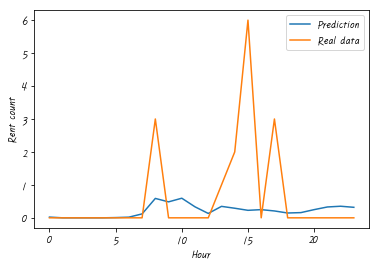

In [46]:
line = sns.lineplot(x =X_test_2015['HOUR'] , y = y_prediction_2015, label='Prediction' )
line = sns.lineplot(x =X_test_2015['HOUR'] , y =Y_test_2015, label='Real data')
line.set(xlabel ='Hour' , ylabel = 'Rent count')
plt.show()

In [47]:
# RSME 계산
errors = np.sqrt(np.mean((y_prediction_2015 - Y_test_2015) ** 2))
# print
print('Error : ' , round(errors , 2) , 'degrees.')

Error :  1.46 degrees.
